In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

ct_scan_path = "/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/111222000/111222000_sample_0.npy"
heatmaps_folder = "/media/volume/gen-ai-volume/MedSyn/results/saliency_maps/111222000/"

heatmap_files = {
    "left":    "111222000_sample_0_token_1_left_heatmaps.npy",
    "severe":  "111222000_sample_0_token_2_severe_heatmaps.npy",
    "consolidation": "111222000_sample_0_token_3_consolidation_heatmaps.npy",
}

token_rgb = {
    "left": (1.0, 0.0, 0.0),    
    "severe": (0.0, 1.0, 0.0),  
    "consolidation": (0.0, 0.0, 1.0), 
}

ct_volume = np.load(ct_scan_path)  # Shape: (1, 1, 64, 64, 64)
ct_slices = ct_volume[0, 0, :, :, :]  # Shape: (64, 64, 64)

def resize_heatmap(heatmap, target_shape=(64, 64, 64)):
    zoom_factors = (
        target_shape[0] / heatmap.shape[0],
        target_shape[1] / heatmap.shape[1],
        target_shape[2] / heatmap.shape[2],
    )
    return zoom(heatmap, zoom_factors, order=1)

# === SETTINGS ===
# selected_tokens = ["consolidation"]
selected_tokens = ["severe", "consolidation"]
# selected_tokens = ["left", "severe", "consolidation"]
# selected_tokens = ["right", "pleural", "effusion"]
# selected_tokens = ["right"]  # You can also use ["right", "pleural", "effusion"]
#selected_tokens = ["pleural"] 
#selected_tokens = ["effusion"] 
# selected_tokens = ["pleural", "effusion"] 
# heatmap_threshold = 0.025  
heatmap_thresholds = {
    "left": 0.012,
    "severe": 0.0250,
    "consolidation": 0.011
}     

# === Load and Resize Saliency Maps ===
heatmaps_per_token = {}
for token in selected_tokens:
    heatmap_path = os.path.join(heatmaps_folder, heatmap_files[token])
    if not os.path.exists(heatmap_path):
        print(f"Missing heatmap: {heatmap_path}")
        continue

    heatmap_data = np.load(heatmap_path)  # Example: shape (64, 8, 8)
    resized = resize_heatmap(heatmap_data, target_shape=(64, 64, 64))  # Now (64, 64, 64)
    heatmaps_per_token[token] = resized

# === Overlay Display Function ===
def overlay_colored_heatmaps_on_ct(ct_scan, heatmap_dict, title):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15))
    axes = axes.flatten()

    for i in range(64):
        ct_slice = ct_scan[i, :, :]
        ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice) + 1e-8)
        ct_rgb = np.stack([ct_norm] * 3, axis=-1)         # Shape: (64, 64, 3)
        ct_rgb = np.flipud(ct_rgb)             # Flip for medical view
        overlay_rgb = ct_rgb.copy()                       # This will be updated with color

        for token, heatmap in heatmap_dict.items():
            heatmap_slice = np.fliplr(heatmap[i, :, :])
            threshold = heatmap_thresholds[token]
            mask = heatmap_slice <= threshold
            # mask = heatmap_slice <= heatmap_threshold   super hack so image quality, 
            masked = heatmap_slice * mask                

            if np.any(mask):
                # Normalize only within the masked low-activation region
                min_val = np.min(masked[mask])
                max_val = np.max(masked[mask])
                if max_val - min_val < 1e-6:
                    normed = np.zeros_like(masked)
                else:
                    normed = (masked - min_val) / (max_val - min_val + 1e-8)

                r, g, b = token_rgb[token]
                for c, color_val in enumerate([r, g, b]):
                    overlay_channel = overlay_rgb[:, :, c]
                    overlay_channel[mask] = (
                        0.6 * overlay_channel[mask] + 0.4 * color_val * normed[mask]
                    )
                    overlay_rgb[:, :, c] = overlay_channel

        axes[i].imshow(overlay_rgb)
        axes[i].set_title(f"Slice {i}", fontsize=8)
        axes[i].axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

overlay_colored_heatmaps_on_ct(
    ct_slices,
    heatmaps_per_token,
    title=f"Multi-Token Colored Overlay: {', '.join(selected_tokens)}"
)


FileNotFoundError: [Errno 2] No such file or directory: '/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/111222000/111222000_sample_0.npy'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

# === File Paths ===
ct_scan_path = "/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/111222000/111222000_sample_0.npy"
heatmaps_folder = "/media/volume/gen-ai-volume/MedSyn/results/saliency_maps/111222000/"


heatmap_files = {
    "left":    "111222000_sample_0_token_1_left_heatmaps.npy",
    "severe":  "111222000_sample_0_token_2_severe_heatmaps.npy",
    "consolidation": "111222000_sample_0_token_3_consolidation_heatmaps.npy",
}

token_rgb = {
    "left": (1.0, 0.0, 0.0),    # Red
    "severe": (0.0, 1.0, 0.0),  # Green
    "consolidation": (0.0, 0.0, 1.0), # Blue
}

ct_volume = np.load(ct_scan_path)  # Shape: (1, 1, 64, 64, 64)
ct_slices = ct_volume[0, 0, :, :, :]  # Shape: (64, 64, 64)

def resize_heatmap(heatmap, target_shape=(64, 64, 64)):
    zoom_factors = (
        target_shape[0] / heatmap.shape[0],
        target_shape[1] / heatmap.shape[1],
        target_shape[2] / heatmap.shape[2],
    )
    return zoom(heatmap, zoom_factors, order=1)

selected_tokens = ["left", "severe", "consolidation"]
heatmap_thresholds = {
    "left": 0.0051,
    "severe": 0.0250,
    "consolidation": 0.011
}     

heatmaps_per_token = {}
for token in selected_tokens:
    heatmap_path = os.path.join(heatmaps_folder, heatmap_files[token])
    if not os.path.exists(heatmap_path):
        print(f"Missing heatmap: {heatmap_path}")
        continue

    heatmap_data = np.load(heatmap_path)
    resized = resize_heatmap(heatmap_data, target_shape=(64, 64, 64))
    heatmaps_per_token[token] = resized

def overlay_intersected_heatmaps_on_ct(ct_scan, heatmap_dict, title):
    intersected_slices = []

    for i in range(64):
        ct_slice = ct_scan[i, :, :]
        ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice) + 1e-8)
        ct_rgb = np.stack([ct_norm] * 3, axis=-1)
        ct_rgb = np.flipud(ct_rgb)
        overlay_rgb = ct_rgb.copy()

        token_masks = []
        token_normed = []

        for token in heatmap_dict:
            heatmap_slice = np.fliplr(heatmap_dict[token][i, :, :])
            threshold = heatmap_thresholds[token]
            mask = heatmap_slice <= threshold
            masked = heatmap_slice * mask

            if np.any(mask):
                min_val = np.min(masked[mask])
                max_val = np.max(masked[mask])
                normed = (masked - min_val) / (max_val - min_val + 1e-8) if max_val - min_val > 1e-6 else np.zeros_like(masked)
            else:
                normed = np.zeros_like(masked)

            token_masks.append(mask)
            token_normed.append(normed)

        # Intersect all token masks
        if token_masks:
            intersect_mask = np.logical_and.reduce(token_masks)
            if np.any(intersect_mask):
                for token, normed in zip(selected_tokens, token_normed):
                    r, g, b = token_rgb[token]
                    for c, color_val in enumerate([r, g, b]):
                        overlay_channel = overlay_rgb[:, :, c]
                        overlay_channel[intersect_mask] = (
                            0.6 * overlay_channel[intersect_mask] + 0.4 * color_val * normed[intersect_mask]
                        )
                        overlay_rgb[:, :, c] = overlay_channel
                intersected_slices.append((i, overlay_rgb))


    n = len(intersected_slices)
    cols = 8
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()

    for ax in axes:
        ax.axis("off")

    for idx, (slice_idx, overlay) in enumerate(intersected_slices):
        axes[idx].imshow(overlay)
        axes[idx].set_title(f"Slice {slice_idx}", fontsize=8)
        axes[idx].axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

overlay_intersected_heatmaps_on_ct(
    ct_slices,
    heatmaps_per_token,
    title=f"Token Intersection (Only Slices with Overlap): {', '.join(selected_tokens)}"
)


FileNotFoundError: [Errno 2] No such file or directory: '/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/111222000/111222000_sample_0.npy'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

# === File Paths ===
ct_scan_path = "/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/222333444/222333444_sample_0.npy"
heatmaps_folder = "/media/volume/gen-ai-volume/MedSyn/results/saliency_maps/222333444/"

# === Token–Filename Mapping ===
heatmap_files = {
    "right":    "222333444_sample_0_token_1_right_heatmaps.npy",
    "pleural":  "222333444_sample_0_token_2_pleural_heatmaps.npy",
    "effusion": "222333444_sample_0_token_3_effusion_heatmaps.npy",
}


# === Token Color Mapping ===
token_rgb = {
    "right": (1.0, 0.0, 0.0),      # Red
    "pleural": (0.0, 1.0, 0.0),    # Green
    "effusion": (0.0, 0.0, 1.0),   # Blue
}

# === Load CT Volume and Extract Slices ===
ct_volume = np.load(ct_scan_path)  # Shape: (1, 1, 64, 64, 64)
ct_slices = ct_volume[0, 0, :, :, :]  # Shape: (64, 64, 64)

# === Resize Helper ===
def resize_heatmap(heatmap, target_shape=(64, 64, 64)):
    zoom_factors = (
        target_shape[0] / heatmap.shape[0],
        target_shape[1] / heatmap.shape[1],
        target_shape[2] / heatmap.shape[2],
    )
    return zoom(heatmap, zoom_factors, order=1)

# === SETTINGS ===
#selected_tokens = ["right", "effusion"]
#selected_tokens = ["effusion"]
#selected_tokens = ["pleural"]
selected_tokens = ["right", "pleural", "effusion"]

heatmap_thresholds = {
    "right": 0.018,
    "pleural": 0.0225,
    "effusion": 0.05
}   

# === Load and Resize Saliency Maps ===
heatmaps_per_token = {}
for token in selected_tokens:
    heatmap_path = os.path.join(heatmaps_folder, heatmap_files[token])
    if not os.path.exists(heatmap_path):
        print(f"Missing heatmap: {heatmap_path}")
        continue

    heatmap_data = np.load(heatmap_path)
    resized = resize_heatmap(heatmap_data, target_shape=(64, 64, 64))
    heatmaps_per_token[token] = resized

# === Overlay Display Function (only intersected slices shown) ===
def overlay_intersected_heatmaps_on_ct(ct_scan, heatmap_dict, title):
    intersected_slices = []

    for i in range(64):
        ct_slice = ct_scan[i, :, :]
        ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice) + 1e-8)
        ct_rgb = np.stack([ct_norm] * 3, axis=-1)
        ct_rgb = np.flipud(ct_rgb)
        overlay_rgb = ct_rgb.copy()

        token_masks = []
        token_normed = []

        for token in heatmap_dict:
            heatmap_slice = np.fliplr(heatmap_dict[token][i, :, :])
            threshold = heatmap_thresholds[token]
            mask = heatmap_slice <= threshold
            masked = heatmap_slice * mask

            if np.any(mask):
                min_val = np.min(masked[mask])
                max_val = np.max(masked[mask])
                normed = (masked - min_val) / (max_val - min_val + 1e-8) if max_val - min_val > 1e-6 else np.zeros_like(masked)
            else:
                normed = np.zeros_like(masked)

            token_masks.append(mask)
            token_normed.append(normed)

        # Intersect all token masks
        if token_masks:
            intersect_mask = np.logical_and.reduce(token_masks)
            if np.any(intersect_mask):
                for token, normed in zip(selected_tokens, token_normed):
                    r, g, b = token_rgb[token]
                    for c, color_val in enumerate([r, g, b]):
                        overlay_channel = overlay_rgb[:, :, c]
                        overlay_channel[intersect_mask] = (
                            0.6 * overlay_channel[intersect_mask] + 0.4 * color_val * normed[intersect_mask]
                        )
                        overlay_rgb[:, :, c] = overlay_channel
                intersected_slices.append((i, overlay_rgb))

    # Plot only intersected slices
    n = len(intersected_slices)
    cols = 8
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()

    for ax in axes:
        ax.axis("off")

    for idx, (slice_idx, overlay) in enumerate(intersected_slices):
        axes[idx].imshow(overlay)
        axes[idx].set_title(f"Slice {slice_idx}", fontsize=8)
        axes[idx].axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# === Run Viewer ===
overlay_intersected_heatmaps_on_ct(
    ct_slices,
    heatmaps_per_token,
    title=f"Token Intersection (Only Slices with Overlap): {', '.join(selected_tokens)}"
)


FileNotFoundError: [Errno 2] No such file or directory: '/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/222333444/222333444_sample_0.npy'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

# === File Paths ===
ct_scan_path = "/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/222333444/222333444_sample_0.npy"
heatmaps_folder = "/media/volume/gen-ai-volume/MedSyn/results/saliency_maps/222333444/"

# === Token–Filename Mapping ===
heatmap_files = {
    "right":    "222333444_sample_0_token_1_right_heatmaps.npy",
    "pleural":  "222333444_sample_0_token_2_pleural_heatmaps.npy",
    "effusion": "222333444_sample_0_token_3_effusion_heatmaps.npy",
}


# === Token Color Mapping ===
token_rgb = {
    "right": (1.0, 0.0, 0.0),      # Red
    "pleural": (0.0, 1.0, 0.0),    # Green
    "effusion": (0.0, 0.0, 1.0),   # Blue
}

# === Load CT Volume and Extract Slices ===
ct_volume = np.load(ct_scan_path)  # Shape: (1, 1, 64, 64, 64)
ct_slices = ct_volume[0, 0, :, :, :]  # Shape: (64, 64, 64)

# === Resize Helper ===
def resize_heatmap(heatmap, target_shape=(64, 64, 64)):
    zoom_factors = (
        target_shape[0] / heatmap.shape[0],
        target_shape[1] / heatmap.shape[1],
        target_shape[2] / heatmap.shape[2],
    )
    return zoom(heatmap, zoom_factors, order=1)

# === SETTINGS ===
#selected_tokens = ["right"]
selected_tokens = ["effusion"]
#selected_tokens = ["pleural"]
#selected_tokens = ["right", "pleural", "effusion"]

heatmap_thresholds = {
    "right": 0.018,
    "pleural": 0.0225,
    "effusion": 0.05
}   

# === Load and Resize Saliency Maps ===
heatmaps_per_token = {}
for token in selected_tokens:
    heatmap_path = os.path.join(heatmaps_folder, heatmap_files[token])
    if not os.path.exists(heatmap_path):
        print(f"Missing heatmap: {heatmap_path}")
        continue

    heatmap_data = np.load(heatmap_path)
    resized = resize_heatmap(heatmap_data, target_shape=(64, 64, 64))
    heatmaps_per_token[token] = resized

# === Overlay Display Function (only intersected slices shown) ===
def overlay_intersected_heatmaps_on_ct(ct_scan, heatmap_dict, title):
    intersected_slices = []

    for i in range(64):
        ct_slice = ct_scan[i, :, :]
        ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice) + 1e-8)
        ct_rgb = np.stack([ct_norm] * 3, axis=-1)
        ct_rgb = np.flipud(ct_rgb)
        overlay_rgb = ct_rgb.copy()

        token_masks = []
        token_normed = []

        for token in heatmap_dict:
            heatmap_slice = np.fliplr(heatmap_dict[token][i, :, :])
            threshold = heatmap_thresholds[token]
            mask = heatmap_slice <= threshold
            masked = heatmap_slice * mask

            if np.any(mask):
                min_val = np.min(masked[mask])
                max_val = np.max(masked[mask])
                normed = (masked - min_val) / (max_val - min_val + 1e-8) if max_val - min_val > 1e-6 else np.zeros_like(masked)
            else:
                normed = np.zeros_like(masked)

            token_masks.append(mask)
            token_normed.append(normed)

        # Intersect all token masks
        if token_masks:
            intersect_mask = np.logical_and.reduce(token_masks)
            if np.any(intersect_mask):
                for token, normed in zip(selected_tokens, token_normed):
                    r, g, b = token_rgb[token]
                    for c, color_val in enumerate([r, g, b]):
                        overlay_channel = overlay_rgb[:, :, c]
                        overlay_channel[intersect_mask] = (
                            0.6 * overlay_channel[intersect_mask] + 0.4 * color_val * normed[intersect_mask]
                        )
                        overlay_rgb[:, :, c] = overlay_channel
                intersected_slices.append((i, overlay_rgb))

    # Plot only intersected slices
    n = len(intersected_slices)
    cols = 8
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()

    for ax in axes:
        ax.axis("off")

    for idx, (slice_idx, overlay) in enumerate(intersected_slices):
        axes[idx].imshow(overlay)
        axes[idx].set_title(f"Slice {slice_idx}", fontsize=8)
        axes[idx].axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# === Run Viewer ===
overlay_intersected_heatmaps_on_ct(
    ct_slices,
    heatmaps_per_token,
    title=f"Token Intersection (Only Slices with Overlap): {', '.join(selected_tokens)}"
)


FileNotFoundError: [Errno 2] No such file or directory: '/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/222333444/222333444_sample_0.npy'

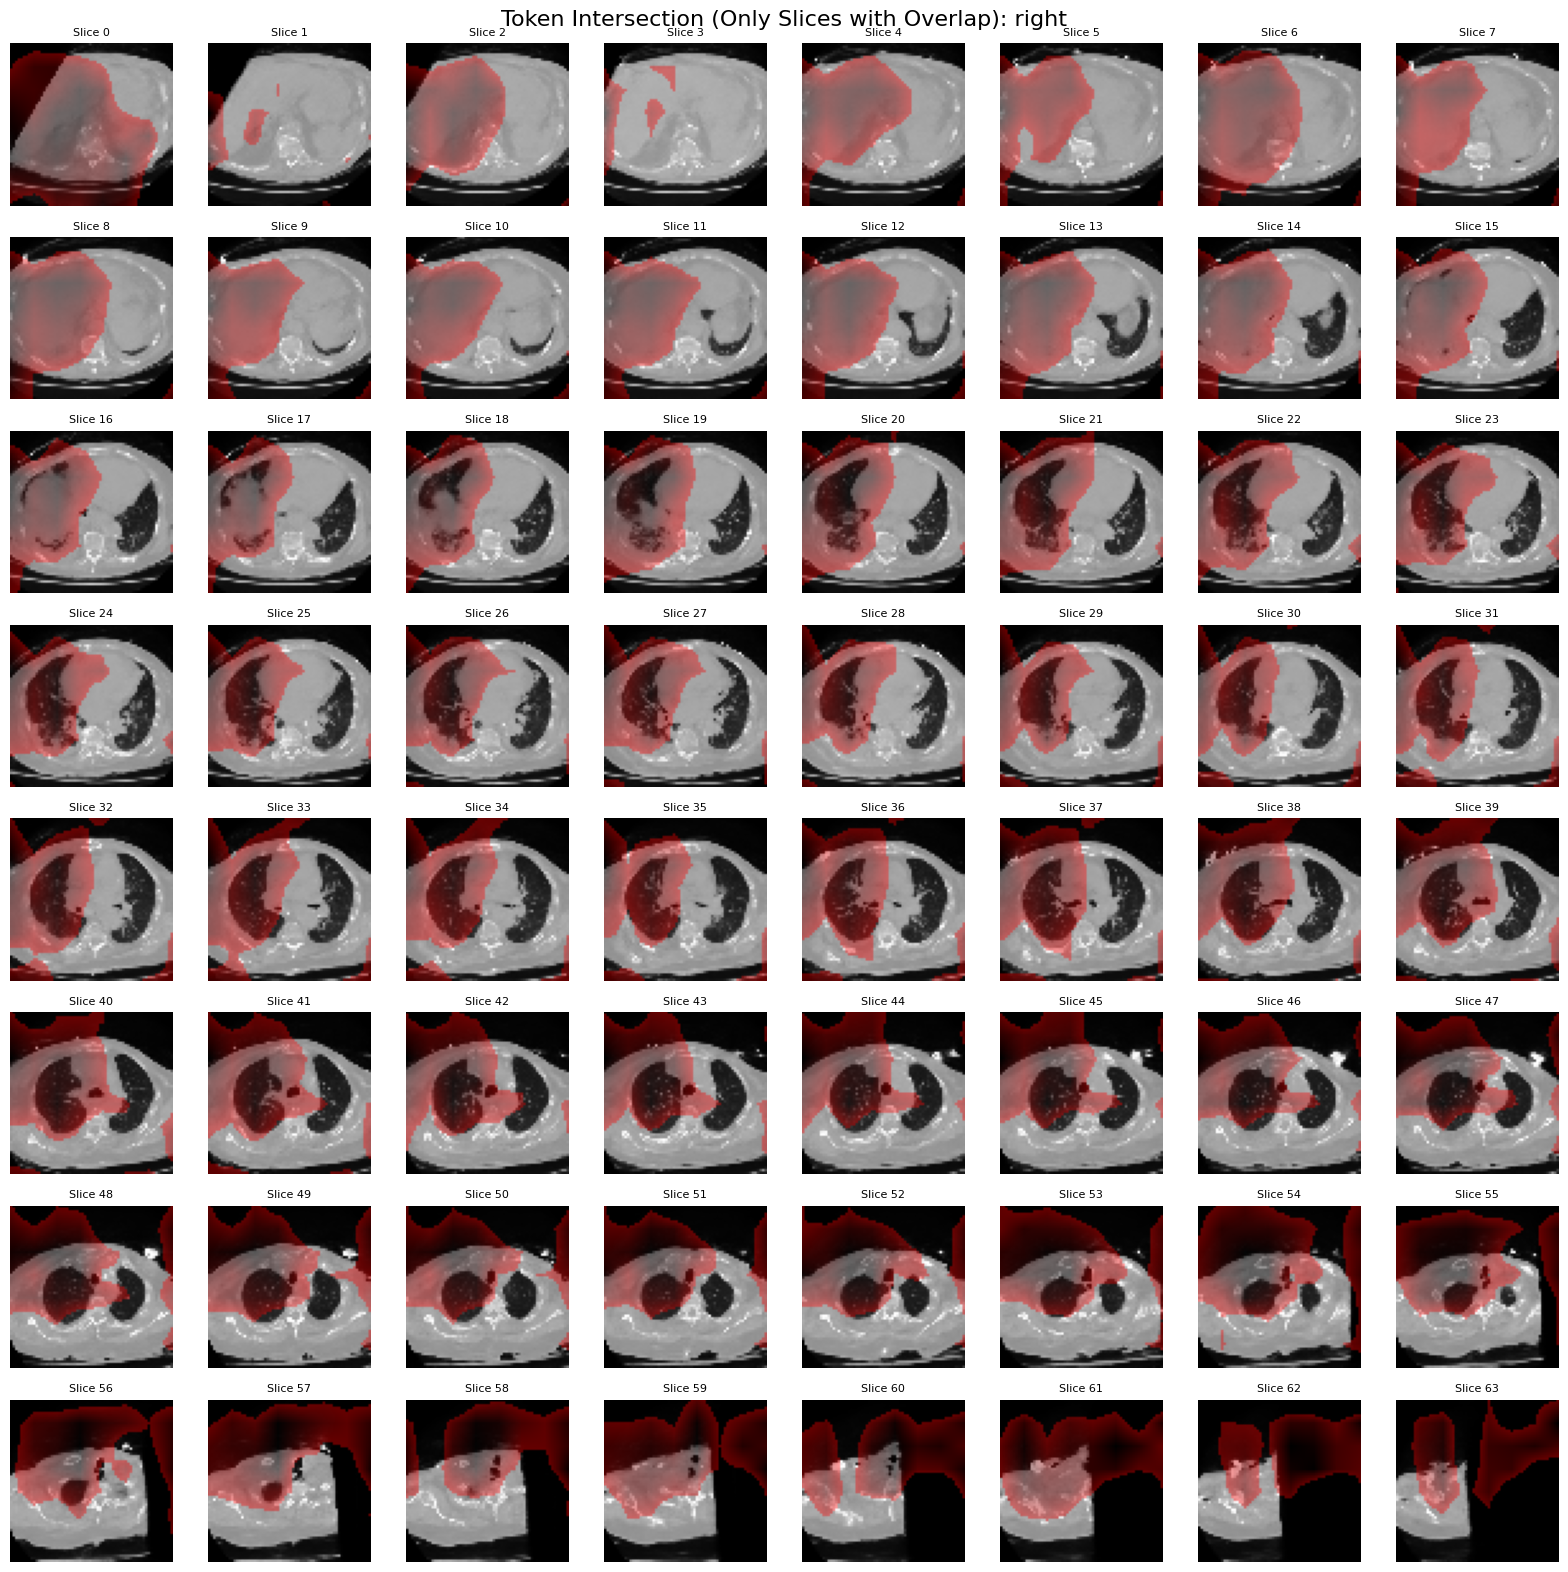

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

# === File Paths ===
ct_scan_path = "/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/222333444/222333444_sample_0.npy"
heatmaps_folder = "/media/volume/gen-ai-volume/MedSyn/results/saliency_maps/222333444/"

# === Token–Filename Mapping ===
heatmap_files = {
    "right":    "222333444_sample_0_token_1_right_heatmaps.npy",
    "pleural":  "222333444_sample_0_token_2_pleural_heatmaps.npy",
    "effusion": "222333444_sample_0_token_3_effusion_heatmaps.npy",
}


# === Token Color Mapping ===
token_rgb = {
    "right": (1.0, 0.0, 0.0),      # Red
    "pleural": (0.0, 1.0, 0.0),    # Green
    "effusion": (0.0, 0.0, 1.0),   # Blue
}

# === Load CT Volume and Extract Slices ===
ct_volume = np.load(ct_scan_path)  # Shape: (1, 1, 64, 64, 64)
ct_slices = ct_volume[0, 0, :, :, :]  # Shape: (64, 64, 64)

# === Resize Helper ===
def resize_heatmap(heatmap, target_shape=(64, 64, 64)):
    zoom_factors = (
        target_shape[0] / heatmap.shape[0],
        target_shape[1] / heatmap.shape[1],
        target_shape[2] / heatmap.shape[2],
    )
    return zoom(heatmap, zoom_factors, order=1)

# === SETTINGS ===
selected_tokens = ["right"]
#selected_tokens = ["effusion"]
#selected_tokens = ["pleural"]
#selected_tokens = ["right", "pleural", "effusion"]

heatmap_thresholds = {
    "right": 0.018,
    "pleural": 0.0210,
    "effusion": 0.05
}   

# === Load and Resize Saliency Maps ===
heatmaps_per_token = {}
for token in selected_tokens:
    heatmap_path = os.path.join(heatmaps_folder, heatmap_files[token])
    if not os.path.exists(heatmap_path):
        print(f"Missing heatmap: {heatmap_path}")
        continue

    heatmap_data = np.load(heatmap_path)
    resized = resize_heatmap(heatmap_data, target_shape=(64, 64, 64))
    heatmaps_per_token[token] = resized

# === Overlay Display Function (only intersected slices shown) ===
def overlay_intersected_heatmaps_on_ct(ct_scan, heatmap_dict, title):
    intersected_slices = []

    for i in range(64):
        ct_slice = ct_scan[i, :, :]
        ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice) + 1e-8)
        ct_rgb = np.stack([ct_norm] * 3, axis=-1)
        ct_rgb = np.flipud(ct_rgb)
        overlay_rgb = ct_rgb.copy()

        token_masks = []
        token_normed = []

        for token in heatmap_dict:
            heatmap_slice = np.fliplr(heatmap_dict[token][i, :, :])
            threshold = heatmap_thresholds[token]
            mask = heatmap_slice <= threshold
            masked = heatmap_slice * mask

            if np.any(mask):
                min_val = np.min(masked[mask])
                max_val = np.max(masked[mask])
                normed = (masked - min_val) / (max_val - min_val + 1e-8) if max_val - min_val > 1e-6 else np.zeros_like(masked)
            else:
                normed = np.zeros_like(masked)

            token_masks.append(mask)
            token_normed.append(normed)

        # Intersect all token masks
        if token_masks:
            intersect_mask = np.logical_and.reduce(token_masks)
            if np.any(intersect_mask):
                for token, normed in zip(selected_tokens, token_normed):
                    r, g, b = token_rgb[token]
                    for c, color_val in enumerate([r, g, b]):
                        overlay_channel = overlay_rgb[:, :, c]
                        overlay_channel[intersect_mask] = (
                            0.6 * overlay_channel[intersect_mask] + 0.4 * color_val * normed[intersect_mask]
                        )
                        overlay_rgb[:, :, c] = overlay_channel
                intersected_slices.append((i, overlay_rgb))

    # Plot only intersected slices
    n = len(intersected_slices)
    cols = 8
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()

    for ax in axes:
        ax.axis("off")

    for idx, (slice_idx, overlay) in enumerate(intersected_slices):
        axes[idx].imshow(overlay)
        axes[idx].set_title(f"Slice {slice_idx}", fontsize=8)
        axes[idx].axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# === Run Viewer ===
overlay_intersected_heatmaps_on_ct(
    ct_slices,
    heatmaps_per_token,
    title=f"Token Intersection (Only Slices with Overlap): {', '.join(selected_tokens)}"
)


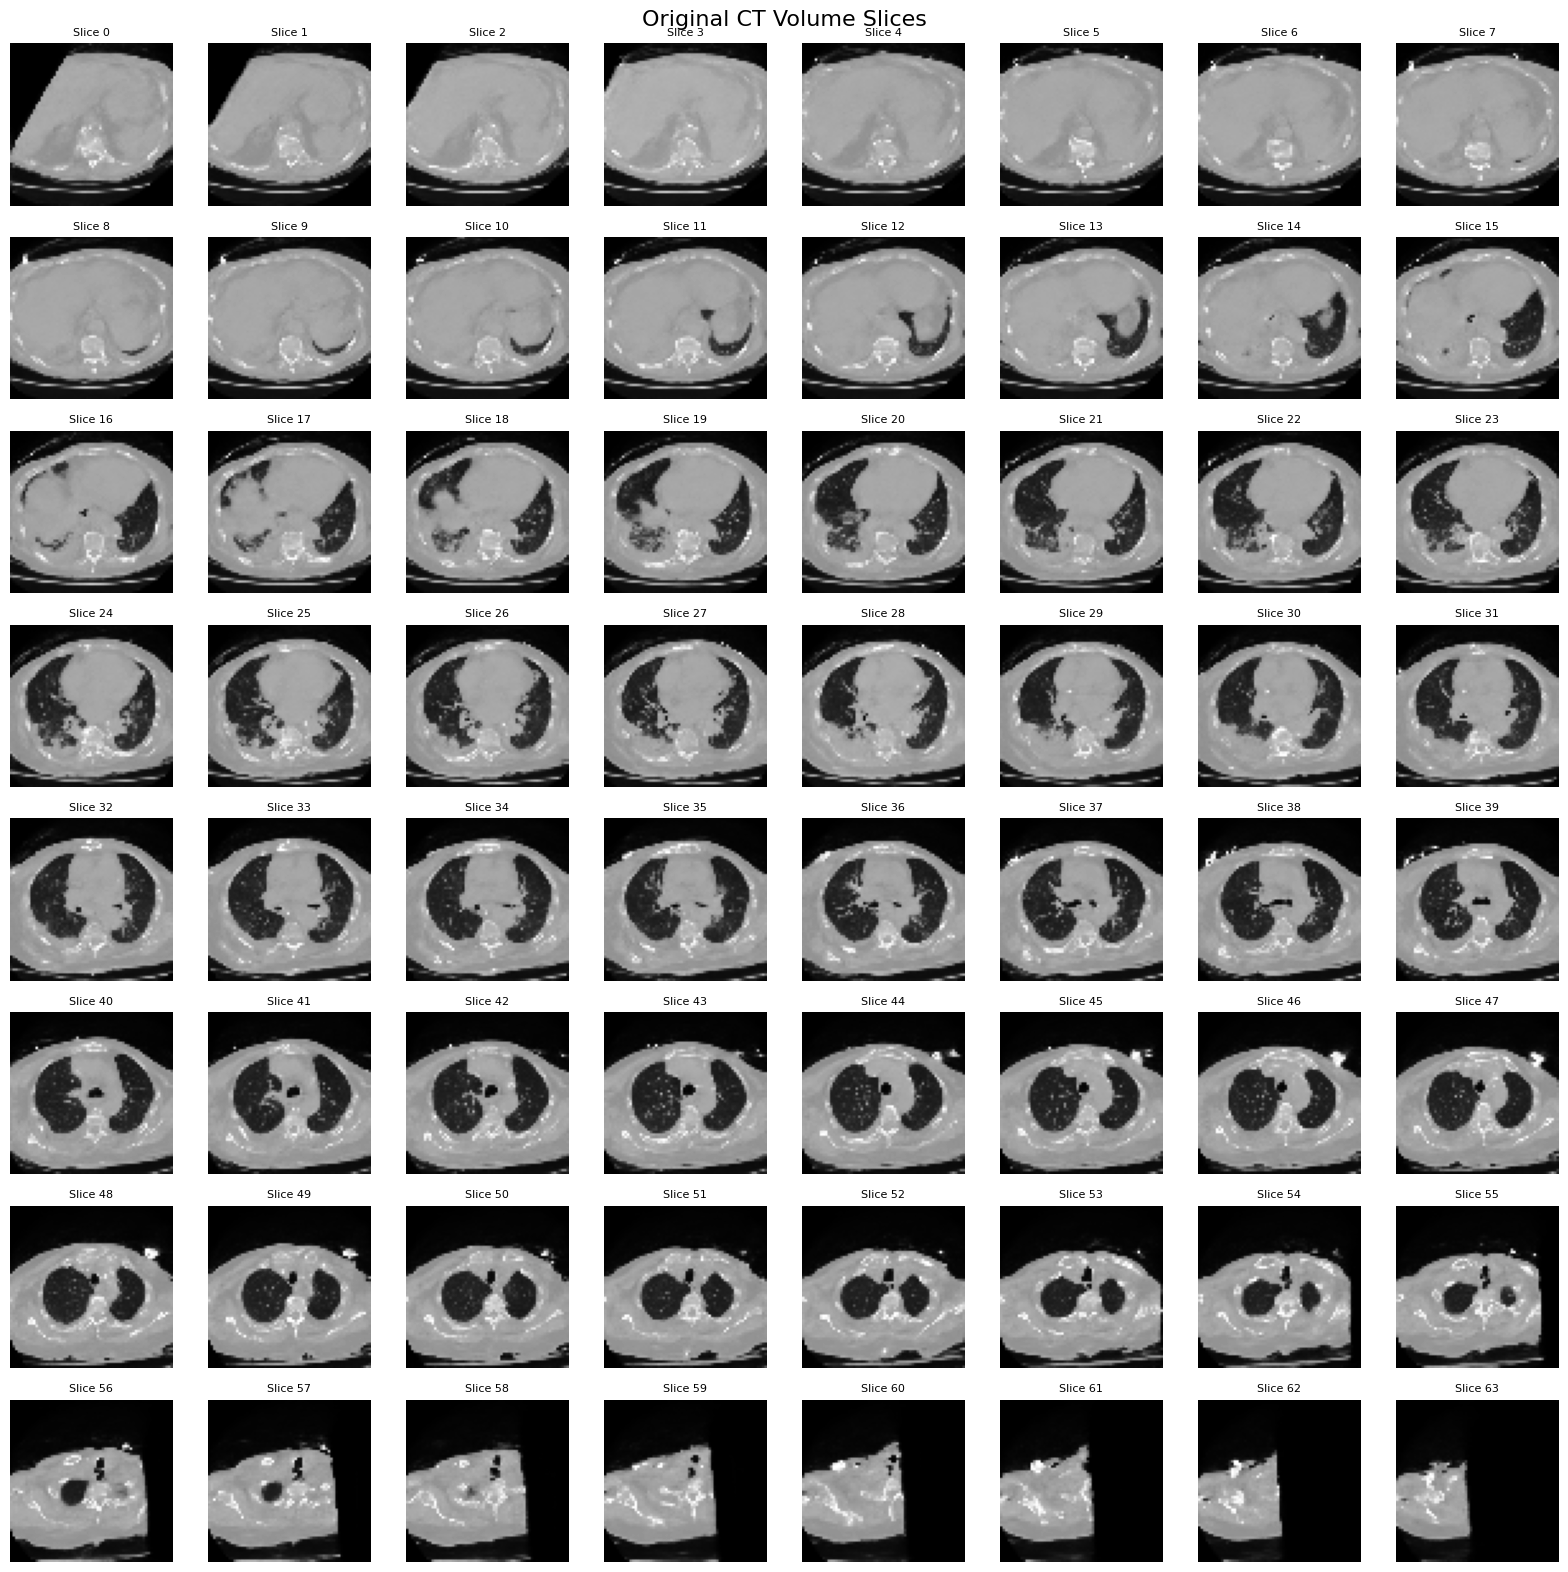

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# === Load CT Volume ===
ct_volume = np.load("/media/volume/gen-ai-volume/MedSyn/results/img_64_standard/222333444/222333444_sample_0.npy")
ct_slices = ct_volume[0, 0, :, :, :]  # Shape: (64, 64, 64)

# === Visualize All Slices in Grid ===
cols = 8
rows = (64 + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for ax in axes:
    ax.axis("off")

for i in range(64):
    slice_img = ct_slices[i, :, :]
    normed = (slice_img - np.min(slice_img)) / (np.max(slice_img) - np.min(slice_img) + 1e-8)
    axes[i].imshow(np.flipud(normed), cmap="gray")
    axes[i].set_title(f"Slice {i}", fontsize=8)

plt.suptitle("Original CT Volume Slices", fontsize=16)
plt.tight_layout()
plt.show()
